<a href="https://colab.research.google.com/github/romajoshi17/CNN-Basics-with-PyTorch/blob/main/CNN_Pytorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN

#### Importing all the necessary libraries and the dataset

In [32]:
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

In [2]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 170M/170M [00:02<00:00, 64.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
classes = trainset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

#### Loading the dataset batch-wise

In [5]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True
)

In [6]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([4, 3, 32, 32])

In [7]:
labels

tensor([5, 8, 0, 4])

#### Visualization

In [8]:
def imshow(img):
    img = np.transpose(img, (1, 2, 0))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)

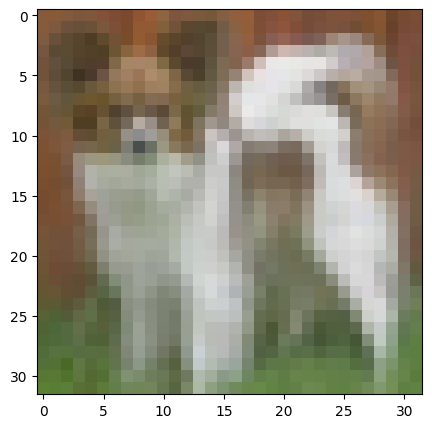

In [9]:
img = images[0]
imshow(img)

In [10]:
#npimg = img.numpy()
#plt.imshow(np.transpose(npimg, (1, 2, 0)))

dog
ship
airplane
deer


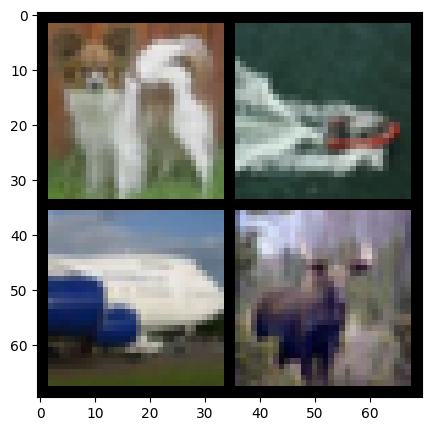

In [11]:
imshow(torchvision.utils.make_grid(images, nrow=2))
for i in range(4):
  print(classes[labels[i]])

#### Single CNN

In [12]:
import torch.nn as nn

In [13]:
class SingleCNN(nn.Module):
  def __init__(self):
    super(SingleCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3)
    # no. of faature maps in input, no.of fature maps in output, kernel size


  def forward(self,x):
    return self.conv1(x)

In [14]:
net = SingleCNN()
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

In [15]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


#### What the kernel has learnt?

In [16]:
first_out = out[0,0,:,:] #first image, first feature map, all rows and columns
first_out.shape

torch.Size([30, 30])

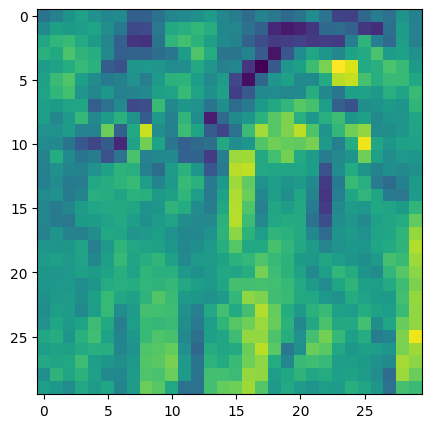

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(first_out.detach())
plt.show()

#### Deep CNN

In [18]:
class DeepCNN(nn.Module):

  def __init__(self):
    super(DeepCNN, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 16, 3), #(N,16,30,30)
        nn.AvgPool2d(2, stride=2), #(N,16,15,15)
        nn.Conv2d(16, 32, 3), #(N,32,13,13)
    )

  def forward(self,x):
    return self.model(x)

In [19]:
net = DeepCNN()
out = net(images)
out.shape

torch.Size([4, 32, 13, 13])

In [20]:
first_out = out[0,0,:,:] #first image, first feature map, all rows and columns
first_out.shape

torch.Size([13, 13])

In [21]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])


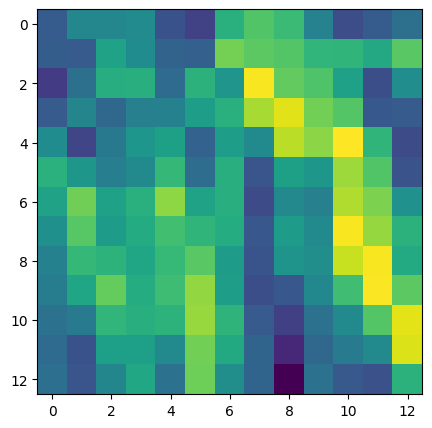

In [22]:
plt.figure(figsize = (5,5))
plt.imshow(first_out.detach())
plt.show()

In [36]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(16*5*5, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self,x):
    #print(x.shape)
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    #print(x.shape)
    return x

In [37]:
net = LeNet()
out = net(images)

In [38]:
out

tensor([[-0.0295, -0.1005, -0.0933, -0.0263, -0.1344, -0.0346,  0.0992,  0.0406,
          0.0382, -0.0688],
        [-0.0180, -0.0998, -0.1050, -0.0191, -0.1350, -0.0425,  0.0772,  0.0555,
          0.0347, -0.0481],
        [-0.0302, -0.0874, -0.1076, -0.0237, -0.1291, -0.0421,  0.0879,  0.0444,
          0.0299, -0.0585],
        [-0.0215, -0.0977, -0.0992, -0.0265, -0.1363, -0.0429,  0.0632,  0.0579,
          0.0304, -0.0459]], grad_fn=<AddmmBackward0>)

In [39]:
torch.max(out.data,1)

torch.return_types.max(
values=tensor([0.0992, 0.0772, 0.0879, 0.0632]),
indices=tensor([6, 6, 6, 6]))

In [50]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=128,
    shuffle=True
)
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=128,
    shuffle=True
)

Files already downloaded and verified
Files already downloaded and verified


In [51]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, b = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (b == labels).sum().item()
  return 100 * correct / total

In [52]:
net = LeNet()

In [53]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [57]:
loss_arr = []
loss_epoch_arr = []
max_epochs = 5

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print("Epoch:", epoch, "Train Acc:", evaluation(trainloader),"Test Acc:", evaluation(testloader))

Epoch: 0 Train Acc: 46.07 Test Acc: 45.58
Epoch: 1 Train Acc: 49.046 Test Acc: 48.02
Epoch: 2 Train Acc: 52.55 Test Acc: 50.31
Epoch: 3 Train Acc: 54.002 Test Acc: 51.67
Epoch: 4 Train Acc: 56.18 Test Acc: 53.29


In [55]:
print(len(loss_arr))

391
